## 1.	Overview of Bayesian Optimization

Bayesian optimization is an approach to optimize the objective function that usually takes a long time (minutes or hours) to evaluate like tuning hyperparameters of a deep neural network. Also, many optimization problems in machine learning are black-box optimization problems where the objective function is unknown (black-box function) or we have no information about its derivatives. Thanks to Bayes theorem, such problems can be handled by developing a Bayesian optimization algorithm. There are many areas where Bayesian optimization (BO) can be a handy tool. To make an example BO has been widely used to design engineering systems (system identification) and choose laboratory experiments in materials (model selection). But this is not the only place that BO can be helpful. In the computer science they are widely used in A/B testing, recommender system, robotics and reinforcement learning, environmental monitoring and sensor networks, preference learning and interactive interfaces, and tuning the hyperparameters in deep neural networks. As can be seen, BO is a class of machine-learning-based optimization algorithm that focuses on solving problems by inferring the data. But as an engineer we should know where the best place is to use BO for our problems.

### 1.1.	 Let’s Answer the Big Question: When We Need the Bayesian Optimization?

*	The BO algorithm works well on the problem where the input dimension is not too large. It is recommended that to use this algorithm for problems with dimensions less than 20.

*	The objective function is continuous. We will see later that this is an assumption for implementation of Gaussian process (GP).

*	Cost matters! The function that we need to optimize is expensive to evaluate. For instance, it requires lots of iterations while our system is limited in performance (computationally cost). On the other hand, the implementation requires purchasing cloud computing environments while our budget is limited (budget limitation).

*	The objective function has one of the following problems: 1) function is unknown (black box), 2) the derivatives unknown or difficult to calculate, and 3) the function is non-convex.

*	We are looking for the global optimum not the local one.


### 1.2.	 Time for Building the BO, Parametric vs. Nonparametric

Bayesian Optimization is an approach that uses Bayes Theorem to direct the search in order to find the minimum or maximum of an objective function. The most efficacy of the Bayesian optimization is in the black box system in which the parameter of the model is unknown (nonparametric Bayesian optimization (NBO)). But imagine that I have a beam which its characteristics are defined by stiffness, elasticity and the applied load (more simplistic imagine we have a model with a, b, and c variables). Further the goal is to find these variables in a way that the beam deflection is minimum. If we consider our model uncertain, this is another place that BO comes to help. In other words, due to the uncertainty that exists in our model, we infer our model to find the variables that describe our model well. This case is defined as the parametric Bayesian optimization (PBO). 

#### 1.2.1.	Parametric Bayesian Optimization (PBO)

In order to define the Bayesian optimization with parametric models, we consider a generic family of models parametrized by w. Imagine we have a set of data $(D)$. Since w is an unobserved quantity, we consider it as a latent random variable which has a prior distribution named $p(w)$. Given a data D and defining the likelihood model as $p(D|w)$, we can then infer a posterior distribution $p(w|D)$ using the Bayes theorem.

$$p(w│D)=\frac{(p(D│w)p(w))}{(p(D))}	\quad \quad(1)$$

The posterior represents the updated beliefs about the model parameters after observing the data $(D)$. The denominator is correspondent to the marginal of likelihood (evidence in literatures) which is usually difficult to evaluate. This problem is considered as a fully Bayesian approach. 

#### 1.2.2.	Nonparametric Bayesian Optimization (NBO)

The NBO is rooted in two components: 1) Bayesian statistical model for modeling the objective function (surrogate) and 2) an acquisition function for deciding where to sample next. The mathematics here is going to be a little bit complex. We will use space-filling experimental design to evaluate the objective function. Then we will perform the iterative calculations to allocate the remainder of a budget of N functions evaluations. Here, the surrogate model is defined as a Gaussian process (GP) which provides the Bayesian posterior probability distribution that describes the potential value for $f(x)$ at the determined point x. Following this, the acquisition function measures the x value at the next step to based on the current posterior evaluation.

## 2.	Nonparametric Bayesian Optimization

In this part, we will see how we can generalize the concept of PBO to NBO in order to optimize our favorite black box. This can be done by marginalizing away the weights in Bayesian linear regression and applying the kernel trick to construct a Bayesian nonparametric regression model. By kernelizing a marginalized version of Bayesian linear regression what we have already done is construct an object called a Gaussian process (GP) which we will discuss in the next part.

In [85]:
Image(url="https://raw.githubusercontent.com/ParisaToofani/OptimizationJourney/main/BayesianOptimization/Images/PseudoCode.png", width=800, height=600)

### 2.1. Gaussian Process



Gaussian process is a nonparametric model that is characterized by its prior mean function ($μ_0$) and its positive definite kernel (covariance) function ($Σ_0$) over the function space. The interesting thing about the  $Σ_0$ is that it is constructed at each pair of points $x_i$ and $x_j$. Therefore, if the points x_i and $x_j$ are close to each other in the input space, they would have the larger positive correlation which put emphasis on the belief that they have more similar function values.
The prior distribution over the functions $[f(x_1 ),f(x_2 ),…,f(x_n )]$ is defined as:

$$f≈\mathcal{N}\left(\left[\begin{matrix}\mu(x_1)\\\vdots\\\mu\left(x_n\right)\\\end{matrix}\right],\ \left[\begin{matrix}\Sigma_0(x_1,x_1)&\ldots&\Sigma_0(x_1,x_n)\\\vdots&\ddots&\vdots\\\Sigma_0(x_n,x_1)&\ldots&\Sigma_0(x_n,x_n)\\\end{matrix}\right]\right)≈GP\left(\underset{{Mean}}{{\underbrace{\mu\left(x_{1:n}\right)}}}\ ,\underset{Kernel}{\underbrace{\Sigma_0(x_{1:n},x_{1:n})}}\ \right)$$


Let’s go one step further and include some data in the problem. Imagine the observation is defined as $D_n={[(x_i,f(x_i)]}_{i=1}^n$. As defined previously, the random variable $f(x)$ conditioned on observations $D_n$ is also normally distributed when kernelizing linear regression. Such a conditioned function is correspondent to the posterior which has the mean of $μ_n$ and $σ_n^2$ which is defined as follows:

$$μ_n (x)=Σ_0 (x,x_{1:n} ) [[Σ_0(x_{1:n},x_{1:n} )+σ^2 I]]^{-1} (f(x_{1:n} )-μ(x_{1:n} ))+μ(x)  \quad\quad	(1)$$

$$σ_n^2 (x)=Σ_0 (x,x)-Σ_0 (x,x_{1:n} ) [[Σ_0 (x_{1:n},x_{1:n} )+σ^2 I]]^{-1} Σ_0 (x_{1:n},x)  \quad\quad	(1)$$


Where $Σ_0 (x,x_{1:n} )$ is a vector of covariance terms between $x$ and $x_{1:n}$. The posterior mean and variance evaluated at any point x represent the model prediction and uncertainty, respectively, in the objective function at the point $x$. The posterior functions are used to select the next query point $x_{n+1}$.

#### 2.1.1.	The prior mean function

The prior mean function provides a possibles a possible offset. In most cases, this function is set to be a constant ($μ(x)≡μ$). However, when f is believed to have a trend or some application specific parametric structure, we could define the mean function to be:

$$μ(x)=μ+∑_{i=1}^pβ_i ψ_i (x)	\quad \quad(1)$$

Where each $\psi_i(x)$ is a parametric function, and often a low-order polynomial in $x$.

#### 2.1.2.	The Choice of Kernel in Gaussian Process

One of the most important components of BO is the covariance (kernel) function which dictates the structure of the response functions that we can fit. To make an example, if we expect the response function to be periodic, we can use periodic kernels. Kernels usually are defined as the points closer in the input space are more strongly correlated. In addition, kernels should be positive-semi definite. Different types of kernels can be defined as follows:

a)	Laplacian function: this function provides a continuous and non-differentiable kernel function. In this case, if you average over your samples, you will get straight line called Brownian bridges.

$$\Sigma_0=\sigma_f^2\exp{\left(-\frac{1}{2l^2}\left|x_i-x_j\right|\right)} \quad \quad (1)$$

b)	Power exponential or Gaussian kernel:

$$\Sigma_0=\sigma_f^2\exp{\left(-\frac{1}{2l^2}\left|\left|x_i-x_j\right|\right|^2\right)} \quad \quad (1)$$

c)	Rational Quadratic:

$$\Sigma_0=\sigma_f^2\exp{\left(1+\frac{1}{2\alpha l^2}\left|\left|x_i-x_j\right|\right|^{-\alpha}\right)} \quad \quad (1)$$

d)	Periodic function:

$$\Sigma_0=\sigma_f^2\cos{\left(\omega\left(x_i-x_j\right)\right)}\exp{\left(-\frac{1}{2l^2}\left(x_i-x_j\right)^2\right)} \quad \quad (1)$$

e)	Matern kernel:Matern kernels are flexible class of stationary kernels. The main parameter to characterize these kernels is $\nu>0$ which defines the smoothness. The following shows the formulation of famous Matern kernels.

$$\Sigma_{0_Mattern1}=\sigma_f^2\exp{\left(-\sqrt{\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)}\right)} \quad \quad (1)$$

$$\Sigma_{0_Mattern3}=\sigma_f^2\exp{\left(-\sqrt3\sqrt{\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)}\right)}\left(1+\sqrt3\sqrt{\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)}\right) \quad \quad (1)$$

$$\Sigma_{0_Mattern5}=\sigma_f^2\exp{\left(-\sqrt5\sqrt{\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)}\right)}\left(1+\sqrt5\sqrt{\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)}+\frac{5}{3}\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)\right) \quad \quad (1)$$

$$\Sigma_{0_Mattern_exp}=\sigma_f^2\exp{\left(-\frac{1}{\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)}\right)} \quad \quad (1)$$


In [57]:
import math
import matplotlib
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.gaussian_process import GaussianProcessRegressor
from mpl_toolkits.axes_grid1 import make_axes_locatable
from warnings import catch_warnings
from warnings import simplefilter
from matplotlib import cm
from IPython.display import Image
import time

In [58]:
# Here, I write an obeject oriented module to define all the priors that exist
class GpKernels:
  def __init__(self, xa, xb, sigmaf=1, l=1):
    self.xa = xa
    self.xb = xb
    self.sigmaf = sigmaf
    self.l = l
  # Define the exponentiated quadratic 
  def laplaciankernel(self):
      diiff = np.sqrt(sp.spatial.distance.cdist(self.xa, self.xb, 'sqeuclidean'))
      sq_norm = -0.5 * np.abs(diiff)
      return (self.sigmaf**2)*np.exp(sq_norm/(self.l**2))

  # Define the exponentiated quadratic 
  def gausskernel(self):
      """Exponentiated quadratic  with σ=1"""
      # L2 distance (Squared Euclidian)
      sq_norm = -0.5 * sp.spatial.distance.cdist(self.xa, self.xb, 'sqeuclidean')
      return (self.sigmaf**2)*np.exp(sq_norm/(self.l**2))

  # Define the exponentiated quadratic 
  def rationalquadkernel(self, alpha):
      sq_norm = -0.5 * np.abs(np.sqrt(sp.spatial.distance.cdist(self.xa, self.xb, 'sqeuclidean')))
      return (self.sigmaf**2)*np.exp(1+np.power(sq_norm, alpha)/(alpha*(self.l**2)))

  # Define the exponentiated quadratic 
  def periodickernel(self, freq):
      diiff = np.sqrt(sp.spatial.distance.cdist(self.xa, self.xb, 'sqeuclidean'))
      sq_norm = -0.5 * np.power(diiff, 2)
      return (self.sigmaf**2)*np.exp(sq_norm/(self.l**2))*np.cos(freq*(diiff))

class GaussianProcess:
  def __init__(self, mu = None, sigma = None):
    self.mu = mu
    self.sigma = sigma

  def gpprior(self, realization):
    return np.random.multivariate_normal(self.mu, self.sigma, realization)

  def gpposterior(self, X1, y1, X2, kernel_func, sigma_noise, np):
    # np --> number of points to conditioned
    # pos --> positive definite
    # Important thing, here we assume that the mean prior is equal to zero
    # Kernel of the noisy observations
    sigma11 = kernel_func(X1, X1).gausskernel()
    # Kernel of observations vs to-predict
    sigma12 = kernel_func(X1, X2).gausskernel()
    # Solve
    solved = sp.linalg.solve(sigma11, sigma12, assume_a='pos').T
    # Compute posterior mean
    muPOST = solved @ y1
    # Compute the posterior covariance
    sigma22 = kernel_func(X2, X2).gausskernel()
    sigmaPOST = sigma22 - (solved @ sigma12)
    return muPOST, sigmaPOST  # mean, covariance


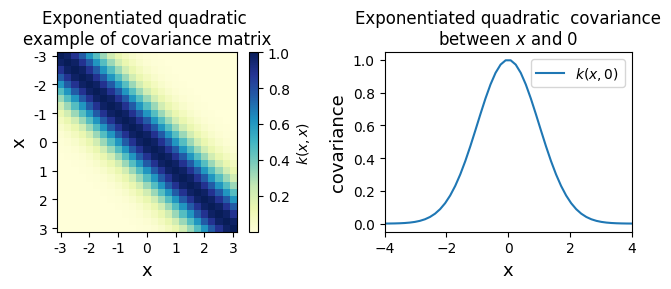

In [59]:
# Illustrate covariance matrix and function
# Show covariance matrix example from exponentiated quadratic
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
xlim = (-3, 3)
X = np.expand_dims(np.linspace(*xlim, 25), 1)
Σ = GpKernels(X, X).gausskernel()
# Plot covariance matrix
im = ax1.imshow(Σ, cmap=cm.YlGnBu)
cbar = plt.colorbar(
    im, ax=ax1, fraction=0.045, pad=0.05)
cbar.ax.set_ylabel('$k(x,x)$', fontsize=10)
ax1.set_title((
    'Exponentiated quadratic \n'
    'example of covariance matrix'))
ax1.set_xlabel('x', fontsize=13)
ax1.set_ylabel('x', fontsize=13)
ticks = list(range(xlim[0], xlim[1]+1))
ax1.set_xticks(np.linspace(0, len(X)-1, len(ticks)))
ax1.set_yticks(np.linspace(0, len(X)-1, len(ticks)))
ax1.set_xticklabels(ticks)
ax1.set_yticklabels(ticks)
ax1.grid(False)

# Show covariance with X=0
xlim = (-4, 4)
X = np.expand_dims(np.linspace(*xlim, num=50), 1)
zero = np.array([[0]])
Σ0 = GpKernels(X, zero).gausskernel()
# Make the plots
ax2.plot(X[:,0], Σ0[:,0], label='$k(x,0)$')
ax2.set_xlabel('x', fontsize=13)
ax2.set_ylabel('covariance', fontsize=13)
ax2.set_title((
    'Exponentiated quadratic  covariance\n'
    'between $x$ and $0$'))
# ax2.set_ylim([0, 1.1])
ax2.set_xlim(*xlim)
ax2.legend(loc=1)

fig.tight_layout()
plt.show()

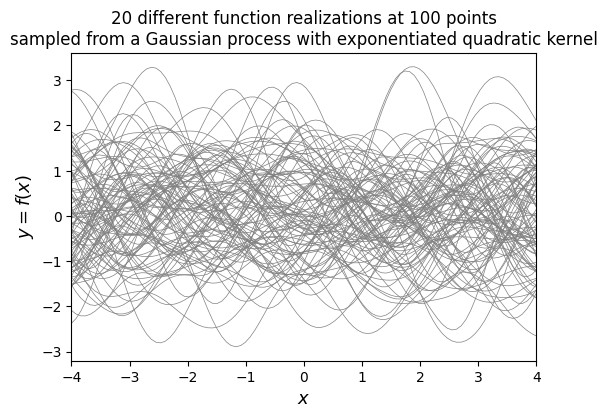

In [60]:
# Sample from the Gaussian process distribution (Prior)
nb_of_samples = 100  # Number of points in each function
number_of_functions = 100  # Number of functions to sample
# Independent variable samples
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
Σ = GpKernels(X, X).periodickernel(1)  # Kernel of data points

# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys = GaussianProcess(mu=np.zeros(nb_of_samples), sigma=Σ).gpprior(number_of_functions)

# Plot the sampled functions
plt.figure(figsize=(6, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i], color = 'gray', linestyle='-', linewidth=0.5)
plt.xlabel('$x$', fontsize=13)
plt.ylabel('$y = f(x)$', fontsize=13)
plt.title((
    '20 different function realizations at 100 points\n'
    'sampled from a Gaussian process with exponentiated quadratic kernel'))
plt.xlim([-4, 4])
plt.show()

In [61]:
# Compute the posterior mean and covariance
# Define the true function that we want to regress on
f_cos = lambda x: (np.cos(x)).flatten()

n1 = 8  # Number of points to condition on (training points)
n2 = 100  # Number of points in posterior (test points)
ny = 100  # Number of functions that will be sampled from the posterior
domain = (-6, 6)

# Sample observations (X1, y1) on the function
X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=(n1, 1))
y1 = f_cos(X1)
# Predict points at uniform spacing to capture function
X2 = np.linspace(domain[0], domain[1], n2).reshape(-1, 1)
# Compute posterior mean and covariance
μ2, Σ2 = GaussianProcess().gpposterior(X1, y1, X2, GpKernels, 0, n1)
# Compute the standard deviation at the test points to be plotted
σ2 = np.sqrt(np.diag(Σ2))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=ny)

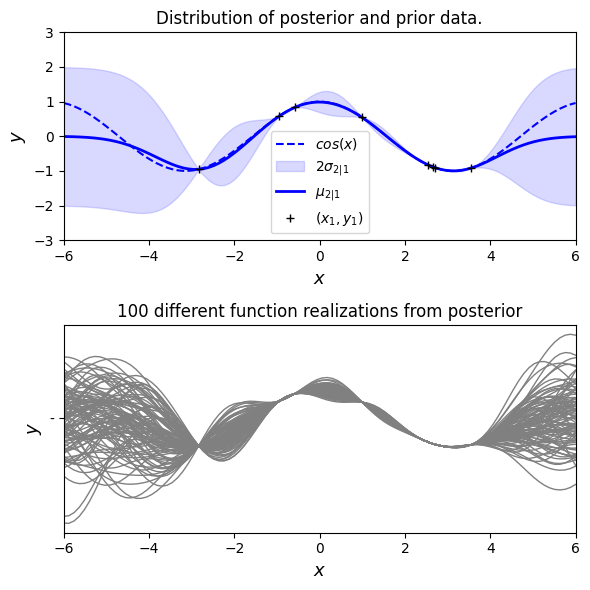

In [62]:
# Plot the postior distribution and some samples
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(6, 6))
# Plot the distribution of the function (mean, covariance)
ax1.plot(X2, f_cos(X2), 'b--', label='$cos(x)$')
ax1.fill_between(X2.flat, μ2-2*σ2, μ2+2*σ2, color='blue', 
                 alpha=0.15, label='$2 \sigma_{2|1}$')
ax1.plot(X2, μ2, 'b-', lw=2, label='$\mu_{2|1}$')
ax1.plot(X1, y1, 'k+', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data.')
ax1.axis([domain[0], domain[1], -3, 3])
ax1.legend()
# Plot some samples from this function
ax2.plot(X2, y2.T, 'gray', '-', linewidth=1)
ax2.set_xlabel('$x$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax2.set_title('100 different function realizations from posterior')
ax1.axis([domain[0], domain[1], -3, 3])
ax2.set_xlim([-6, 6])
plt.tight_layout()
plt.show()
#


### 2.2. Acquisition Function

Proposing sampling points in the search space is done by acquisition functions. They trade off exploitation and exploration. Exploitation means sampling where the surrogate model predicts a high objective and exploration means sampling at locations where the prediction uncertainty is high. Both correspond to high acquisition function values and the goal is to maximize the acquisition function to determine the next sampling point. There are two famous approaches to implement the acquisition function named “probability of improvement (PI)” and and “expected improvement (EI)”. But before getting to each algorithm let’s define what is the improvement. Imagine the objective function that we defined is $f(x)$ and the current observe point is defined as $x^*$, then the improvement function $I(x)$ is defined as follows:

$$I(x)=max⁡(f(x)-f(x^* ),0) \quad \quad$$

#### 2.2.1.	Probability of Improvement (PI)

As we are using the GP, we know that at every point of observation we apply a Gaussian distribution. Therefore, at point x the value of the function f(x) is sampled from the normal distribution with mean μ(x) and variance of the σ^2 (x). Finally, the probability of improvement is defined as:

$$PI(x)=1-ϕ(z_0 )=ϕ(-z_0 )=ϕ((μ(x)-f(x^* ))/σ(x) ) \quad \quad (1)$$

In [63]:
def probability_improvement(model, X, Xsamples):
         # calculate the best surrogate score found so far
         yhat = model.predict(X)
         best = max(yhat)
         # calculate mean and stdev via surrogate function
         mu, std = model.predict(Xsamples, return_std=True)
         # calculate the probability of improvement
         pi = sp.stats.norm.cdf((mu - best) / (std+1E-9))
         return pi

#### 2.2.2.	Expected Improvement (EI)

PI only considers the probability of the point at the current step. However, the effect of the higher moments can affect the improvement (magnitude of improvement). To solve such a problem, the expected improvement is defined as follows:

$$EI(x)≡E[I(x)]=∫I(x)ϕ(z)dz→ϕ(z)=1/√{2π}  exp⁡(-z^2/2)   \quad \quad$$

$$EI\left(x\right)=\int_{z_0}^{\infty\ \ }{max\left(f\left(x\right)-f\left(x^\ast\right),0\right)\phi\left(z\right)dz=}\int_{z_0}^{\infty\ \ }\left(\mu+\sigma z-f\left(x^\ast\right)\right)\phi\left(z\right)dz=\int_{z_0}^{\infty\ \ }\left(\mu-f\left(x^\ast\right)\right)\phi\left(z\right)dz+\int_{z_0}^{\infty\ \ }{\sigma\ z\ \frac{1}{\sqrt{2\pi}}\ e^{\left(-\frac{z^2}{2}\right)}dz}=\left(\mu-f\left(x^\ast\right)\right)\int_{z_0}^{\infty\ \ }\phi\left(z\right)dz+\sigma\frac{1}{\sqrt{2\pi}}\int_{z_0}^{\infty\ \ }{z\ e^{\left(-\frac{z^2}{2}\right)}dz}=\left(\mu-f\left(x^\ast\right)\right)\left(1-\Phi\left(z_0\right)\right)+\sigma\phi\left(z_0\right)=\left(\mu-f\left(x^\ast\right)\right)\Phi\left(\frac{\mu-f\left(x^\ast\right)}{\sigma}\right)+\sigma\phi\left(\frac{\mu-f\left(x^\ast\right)}{\sigma}\right) \quad \quad (1)$$

In [64]:
def expected_improvement(model, X, X_sample, xi=0.01):
    mu, sigma = model.predict(X, return_std=True)
    mu_sample = model.predict(X_sample)

    sigma = sigma.reshape(-1, 1)
    mu_sample_opt = np.max(mu_sample)

    with np.errstate(divide='warn'):
        imp = mu - mu_sample_opt - xi
        Z = imp / sigma
        ei = imp * sp.stats.norm.cdf(Z) + sigma * sp.stats.norm.pdf(Z)
#         ei[sigma == 0.0] = 0.0

    return ei

## 3.	Implementing the Bayesian Optimization from scratch

Now it is the time to put all components together, here, step by step, the Bayesian optimization is implemented using a simple function.

Here, instead of using our 1D Gaussian Process model, we will use gaussian process module provided by scikit-learn.

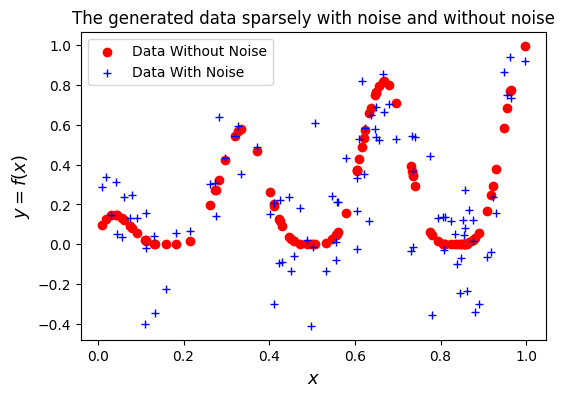

In [65]:
"""
Step 1: Define the objective function --> Here, I choose a simple trigonometric function with added noise
"""
def objectivefunction(x, noise=0.1):
  whitenoise = np.random.normal(loc=0, scale=noise)
  return (x**0.5 * np.cos(3 * np.pi * x)**4) + whitenoise

# Plot the observation
# sample the domain sparsely with noise and without noise
import random
X = np.random.random(100)
y = np.asarray([objectivefunction(x, noise=0.2) for x in X])
y_without_noise = np.asarray([objectivefunction(x, noise=0) for x in X])

plt.figure(figsize=(6, 4))
plt.scatter(X, y_without_noise, c = 'r', marker='o', linewidth=1, label='Data Without Noise')
plt.scatter(X, y, c = 'b', marker='+', linewidth=1, label='Data With Noise')
plt.xlabel('$x$', fontsize=13)
plt.ylabel('$y = f(x)$', fontsize=13)
plt.title('The generated data sparsely with noise and without noise')
# plt.xlim([-4, 4])
plt.legend()
plt.show()

# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

In [66]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, Matern

"""
Step 2: Define the gaussian process model
"""
#=======================================================================
# Define the Gaussian process model, here the Kernel is set to be Matern
#=======================================================================
noise=0.2
m52 = ConstantKernel(1.0) * Matern(length_scale=1.0, nu=2.5)
gpr = GaussianProcessRegressor(kernel=m52, alpha=noise**2)

#=======================================================================
# fit the model
gpr.fit(X, y)

GaussianProcessRegressor(alpha=0.04000000000000001,
                         kernel=1**2 * Matern(length_scale=1, nu=2.5))

In [67]:
"""
Step 3: Perform the optimization process
"""
# Defining the optimization for acquisition function
def opt_acquisition(X, y, surrogate, algorithm):
     # random search, generate random samples
     Xsamples = np.random.random(100)
     Xsamples = Xsamples.reshape(len(Xsamples), 1)
     # calculate the acquisition function for each sample
     scores = algorithm(surrogate, X, Xsamples)
     # locate the index of the largest scores
     ix = np.argmax(scores)
     print(scores.shape)
     return Xsamples[ix, 0]

t1 = time.time()
for i in range(100):
     # select the next point to sample
     x = opt_acquisition(X, y, gpr, probability_improvement)
     # sample the point
     actual = objectivefunction(x)
     # summarize the finding
     est, _ = gpr.predict([[x]], return_std=True)
     print('>x=%.3f, f(x)=%3f, actual=%.3f' % (x, est, actual))
     # add the data to the dataset
     X = np.vstack((X, [[x]]))
     y = np.vstack((y, [[actual]]))
     # update the model
     gpr.fit(X, y)
    
t2 = time.time()
print("Run time is: ", t2-t1)

(100,)
>x=0.989, f(x)=0.864714, actual=1.019
(100,)
>x=0.965, f(x)=0.761073, actual=0.710
(100,)
>x=0.996, f(x)=0.920830, actual=1.047
(100,)
>x=0.999, f(x)=0.962768, actual=1.073
(100,)
>x=0.989, f(x)=0.953933, actual=0.812
(100,)
>x=0.997, f(x)=0.962956, actual=0.940
(100,)
>x=0.999, f(x)=0.964793, actual=1.017
(100,)
>x=0.995, f(x)=0.960656, actual=1.065
(100,)
>x=0.999, f(x)=0.985052, actual=1.040
(100,)
>x=0.996, f(x)=0.980609, actual=0.855
(100,)
>x=0.996, f(x)=0.970339, actual=0.963
(100,)
>x=0.994, f(x)=0.963824, actual=0.991
(100,)
>x=0.991, f(x)=0.951013, actual=0.858
(100,)
>x=0.999, f(x)=0.975242, actual=1.055
(100,)
>x=0.991, f(x)=0.952997, actual=0.824
(100,)
>x=0.998, f(x)=0.972419, actual=0.963
(100,)
>x=0.987, f(x)=0.923369, actual=1.013
(100,)
>x=1.000, f(x)=0.979594, actual=0.950
(100,)
>x=0.999, f(x)=0.974448, actual=1.010
(100,)
>x=0.987, f(x)=0.929960, actual=1.076
(100,)
>x=0.978, f(x)=0.880861, actual=1.006
(100,)
>x=0.979, f(x)=0.895037, actual=0.996
(100,)
>x=

In [69]:
"""
Step 4: Results Generation
"""
ix = np.argmax(y)
print("============================================\n")
print("The optimal point is: ", X[ix][0])
print("============================================\n")
print("The optimal value is: ", y[ix][0])
print("============================================\n")
print("Run time is:  11.096")
print("============================================\n")


The optimal point is:  0.9959590223477005

The optimal value is:  1.2596657851305413

Run time is:  11.096



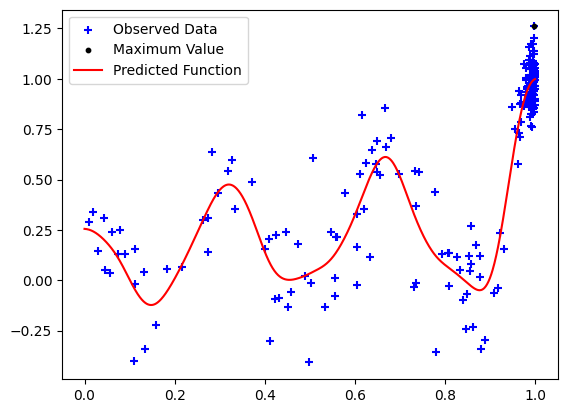

In [70]:
"""
Step 5: Plots
"""
plt.scatter(X, y, c='blue', marker='+', label='Observed Data')
plt.scatter(X[ix], y[ix], c='k', s=10, marker='o', label='Maximum Value')
Xsamples = np.asarray(np.arange(0, 1, 0.001))
Xsamples = Xsamples.reshape(len(Xsamples), 1)
ysamples = gpr.predict(Xsamples)
plt.plot(Xsamples, ysamples, 'r', label='Predicted Function')
plt.legend()
plt.show()

## 4.	Libraries to Perform Bayesian Optimization

### 4.1. GpyOpt

GPyOpt is a Python open-source library for Bayesian Optimization developed by the Machine Learning group of the University of Sheffield. It is based on GPy, a Python framework for Gaussian process modelling. GpyOpt is able to automatically configure the models and Machine Learning algorithms and design the wet-lab experiments while saving time and money. Among other functionalities, GPyOpt can design experiments in parallel, use cost models and mix different types of variables in system designs. 

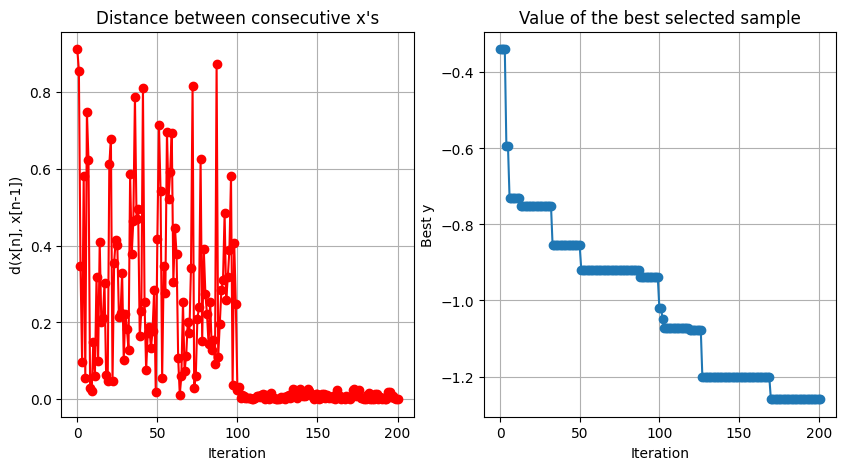

In [72]:
import GPy
import GPyOpt
from GPyOpt.methods import BayesianOptimization
t3 = time.time()
bounds = np.array([[0.0, 1.0]])
kernel = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0)
bds = [{'name': 'X', 'type': 'continuous', 'domain': bounds.ravel()}]
X_init = X
Y_init = y
optimizer = BayesianOptimization(f=objectivefunction, 
                                 domain=bds,
                                 model_type='GP',
                                 kernel=kernel,
                                 acquisition_type ='EI',
                                 acquisition_jitter = 0.01,
                                 X=X_init,
                                 Y=-Y_init,
                                 noise_var = noise**2,
                                 exact_feval=False,
                                 normalize_Y=False,
                                 maximize=True)

optimizer.run_optimization(max_iter=10)
t4 = time.time()
Runtime = t4 - t3
optimizer.plot_convergence()

#### Discussion

The chart with a red line shows the distance of the x’s values evaluated in each iteration. This means that the algorithm took in a defined range x points started its evaluation.

Then, by looking at the right chart, the behavior of this chart is the accuracy given the optimized parameters with the Bayes optimization technique. That means, that after approximately 15 iterations with the Bayes optimization technique the accuracy had minor changes in their accuracy.

In [74]:
print("============================================\n")
print("The optimal point is: ", optimizer.x_opt[0])
print("============================================\n")
print("The optimal value is: ", -1*optimizer.fx_opt)
print("============================================\n")
print("Run time is: ", Runtime)
print("============================================\n")


The optimal point is:  0.9959590223477005

The optimal value is:  1.2596657851305413

Run time is:  3.857125997543335



### 4.2. Scikit-Optimize

Scikit-optimize is a library for sequential model-based optimization that is based on scikit-learn. It also supports Bayesian optimization using Gaussian processes. The API is designed around minimization, hence, we have to provide negative objective function values.

In [75]:
from sklearn.base import clone
import sys
from skopt import gp_minimize
from skopt.learning import GaussianProcessRegressor
from skopt.learning.gaussian_process.kernels import ConstantKernel, Matern

# Use custom kernel and estimator to match previous example
t5 = time.time()
m52 = ConstantKernel(1.0) * Matern(length_scale=1.0, nu=2.5)
gpr = GaussianProcessRegressor(kernel=m52, alpha=noise**2)

r = gp_minimize(lambda x: -objectivefunction(np.array(x))[0], 
                bounds.tolist(),
                base_estimator=gpr,
                acq_func='EI',      # expected improvement
                xi=0.01,            # exploitation-exploration trade-off
                n_calls=10,         # number of iterations
                n_random_starts=0,  # initial samples are provided
                x0=X_init.tolist(), # initial samples
                y0=-Y_init.ravel())

# Fit GP model to samples for plotting results
gpr.fit(r.x_iters, -r.func_vals)
t6 = time.time()
Runtime1 = t6 - t5

In [77]:
print("============================================\n")
print("The optimal point is: ", r.x[0])
print("============================================\n")
print("The optimal value is: ", -1*r.fun)
print("============================================\n")
print("Run time is: ", Runtime1)
print("============================================\n")


The optimal point is:  0.9959590223477005

The optimal value is:  1.2596657851305413

Run time is:  20.19169282913208



In [78]:
def plot_convergence(X_sample, Y_sample, n_init=2):
    plt.figure(figsize=(12, 3))

    x = X_sample[n_init:].ravel()
    y = Y_sample[n_init:].ravel()
    r = range(1, len(x)+1)
    
    x_neighbor_dist = [np.abs(a-b) for a, b in zip(x, x[1:])]
    y_max_watermark = np.maximum.accumulate(y)
    
    plt.subplot(1, 2, 1)
    plt.plot(r[1:], x_neighbor_dist, 'bo-')
    plt.xlabel('Iteration')
    plt.ylabel('Distance')
    plt.title('Distance between consecutive x\'s')

    plt.subplot(1, 2, 2)
    plt.plot(r, y_max_watermark, 'ro-')
    plt.xlabel('Iteration')
    plt.ylabel('Best Y')
    plt.title('Value of best selected sample')

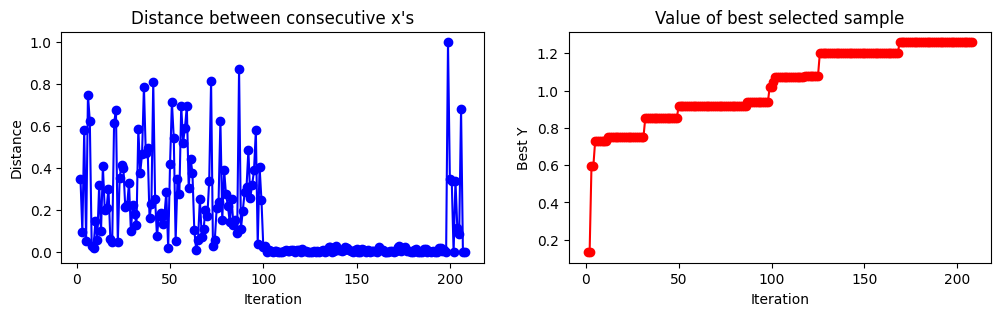

In [79]:
plot_convergence(np.array(r.x_iters), -r.func_vals)

### 4.3. Comparison Between the Results of the Custom BO Model, GpyOPT, and Scikit-Opt

| Approach | Optimal Point | Optimal Value |Run Time (s)|
| ----- | ----- | ----- | ----- |
| Custom BO Model |  0.99595 | 1.25966 | 11.096 |
| GpyOpt |  0.99595 | 1.25966 | 3.85712 |
| Scikit-Opt | 0.99595 | 1.2596 | 20.19 |

## 5. Asdvance Usage of Bayesian Optimization

### 5.1. Hyper-parameter Tuning

Hyperparameter-tuning is the process of searching the most accurate hyperparameters for a dataset with a Machine Learning algorithm. To do this, we fit and evaluate the model by changing the hyperparameters one by one repeatedly until we find the best accuracy.


**What is the difference between parameter and hyperparameter?**

* **Model parameters**: These are the parameters that are estimated by the model from the given data. For example the weights of a deep neural network. 

* **Model hyperparameters**: These are the parameters that cannot be estimated by the model from the given data. These parameters are used to estimate the model parameters. For example, the learning rate in deep neural networks.

But the main question is that what is the efficient approach for tuning the hyper-parameters?

In general, there are four main approahces including:

1. Manual Search
2. Grid Search CV
3. Random Search CV
4. Bayesian Optimization



#### 5.1.1 Manual Search

Manual hyperparameter tuning involves experimenting with different sets of hyperparameters manually i.e. each trial with a set of hyperparameters will be performed by you. This technique will require a robust experiment tracker which could track a variety of variables from images, logs to system metrics.

#### 5.1.2 Grid Search

In the grid search method, we create a grid of possible values for hyperparameters. Each iteration tries a combination of hyperparameters in a specific order. It fits the model on each and every combination of hyperparameters possible and records the model performance. Finally, it returns the best model with the best hyperparameters.

#### 5.1.3 Random Search

In the random search method, we create a grid of possible values for hyperparameters. Each iteration tries a random combination of hyperparameters from this grid, records the performance, and lastly returns the combination of hyperparameters that provided the best performance.

In [39]:
Image(url="https://raw.githubusercontent.com/ParisaToofani/OptimizationJourney/main/BayesianOptimization/Images/gridvsrandom.png", width=600, height=600)

#### 5.1.4 Bayesian Optimization

In the random search method, we create a grid of possible values for hyperparameters. Each iteration tries a random combination of hyperparameters from this grid, records the performance, and lastly returns the combination of hyperparameters that provided the best performance.

#### 5.1.5 HyperOpt (Hyperparameter Tuning based on Bayesian Optimization) Module in Python

HyperOpt is an open-source python library created by James Bergstra in 2011. HyperOpt is a tool that allows the automation of the search for the optimal hyperparameters of a machine learning model. HyperOpt is based on Bayesian Optimization supported by a SMBO methodology adapted to work with different algorithms such as: Tree of Parzen Estimators (TPE), Adaptive Tree of Parzen Estimators (ATPE) and Gaussian Processes (GP).

HyperOpt requires 4 essential components for the optimization of hyperparameters: the search space, the loss function, the optimization algorithm and a database for storing the history (score, configuration). The search space will be determined by a continuous and convex function. The loss function is that function that needs to be optimized, which is obtained by evaluating the model with the “c” configuration. The optimization algorithm is based on the SMBO methodology with the variants given by the GP, TPE and ATPE algorithms. The “H” database stores a set of tuples (score, configuration) obtained through the iterations of the optimization algorithm.

In [38]:
Image(url="https://raw.githubusercontent.com/ParisaToofani/OptimizationJourney/main/BayesianOptimization/Images/HyperOpt.png", width=600, height=600)

#### 5.1.6 Real World Problem: Tuning HyperParameter in ML-Based Building Response Estimation Model Under an Earthquake

**Problem Definition**:

A multi-degree of freedom (MDOF) simplified 2D shear-building model combined with 222 ground motions ranging from 0.05g to 1.80 g peak ground accelerations are analyzed using OpenSeesPy. The nonlinearity of models is created using the inter-story hysteretic model proposed in HAZUS. methodology, considering the building type, number of stories and construction year. Then, response-history analysis is conducted to generate a comprehensive dataset for machine learning algorithms. The proposed algorithm used the ground motion as well as structural characteristics such as PGA, Sa (0.2s), Sa(1s) and Sa(T1), story height, story mass, and period as input variables to estimate the responses of different structures.

By performing several analysis, the XGboost Regression model performs better on the mentioned model. However, we still looking for improving the generated model using the hyperparameter tuning approaches.

**Goal: We are interested to perform both Random Search and Bayesian Optimization to find optimal Hyperparameters of the model.**

In [82]:
Image(url="https://raw.githubusercontent.com/ParisaToofani/OptimizationJourney/main/BayesianOptimization/Images/PoblemModel.png", width=800, height=600)

In [30]:
from hyperopt import hp
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import uniform
from xgboost import XGBRegressor

In [31]:
dataset = pd.read_csv("C://AllMyCodes//OptimizationProject//OptimizationJourney//OptimizationinDL//c2.csv")
dataset=dataset.drop(['#', 'seismicity', 'story_num', 'disp_dir1', 'react_dir1', 'Mass', 'Period', 'accel_dir1', 'disp_dir1', 'vel_dir1'], axis=1)
dataset

,sa02,sa1,sat,pga,zi/h,Total height,drift_dir1
0,1.9294,0.7536,2.1144,0.5831,0.0,3.2,0.000000
1,0.2842,0.2023,0.2172,0.1395,0.0,3.2,0.000000
2,0.3191,0.3029,0.3062,0.1591,0.0,3.2,0.000000
3,0.8270,0.3352,1.0861,0.3378,0.0,3.2,0.000000
4,0.8847,0.3805,1.2538,0.5465,0.0,3.2,0.000000
...,...,...,...,...,...,...,...
19975,0.7142,0.5385,0.5041,0.3854,1.0,38.4,0.005181
19976,0.6358,0.4857,0.3770,0.3461,1.0,38.4,0.001399
19977,0.9575,0.2976,0.2387,0.4431,1.0,38.4,0.007332
19978,0.4173,0.1540,0.1221,0.1727,1.0,38.4,0.001016


In [32]:
data = dataset.iloc[:, :].values
X=data[:,:6]
y=data[:,6:]

In [33]:
# Instantiate an XGBRegressor with default hyperparameter settings
xgb = XGBRegressor()

# and compute a baseline to beat with hyperparameter optimization 
baseline = cross_val_score(xgb, X, y, scoring='neg_mean_squared_error').mean()

In [34]:
# Hyperparameters to tune and their ranges
param_dist = {"learning_rate": uniform(0, 1),
              "gamma": uniform(0, 5),
              "max_depth": range(1,50),
              "n_estimators": range(1,300),
              "min_child_weight": range(1,10)}

rs = RandomizedSearchCV(xgb, param_distributions=param_dist, 
                        scoring='neg_mean_squared_error', n_iter=25)

# Run random search for 25 iterations
rs.fit(X, y);

In [35]:
bds = [{'name': 'learning_rate', 'type': 'continuous', 'domain': (0, 1)},
        {'name': 'gamma', 'type': 'continuous', 'domain': (0, 5)},
        {'name': 'max_depth', 'type': 'discrete', 'domain': (1, 50)},
        {'name': 'n_estimators', 'type': 'discrete', 'domain': (1, 300)},
        {'name': 'min_child_weight', 'type': 'discrete', 'domain': (1, 10)}]

# Optimization objective 
def cv_score(parameters):
    parameters = parameters[0]
    score = cross_val_score(
                XGBRegressor(learning_rate=parameters[0],
                              gamma=int(parameters[1]),
                              max_depth=int(parameters[2]),
                              n_estimators=int(parameters[3]),
                              min_child_weight = parameters[4]), 
                X, y, scoring='neg_mean_squared_error').mean()
    score = np.array(score)
    return score

optimizer = BayesianOptimization(f=cv_score, 
                                 domain=bds,
                                 model_type='GP',
                                 acquisition_type ='EI',
                                 acquisition_jitter = 0.05,
                                 exact_feval=True, 
                                 maximize=True)

# Only 20 iterations because we have 5 initial random points
optimizer.run_optimization(max_iter=20)

Baseline  MSE = -0.00022
Random search  MSE = -0.00053
Bayesian optimization  MSE = -0.00052


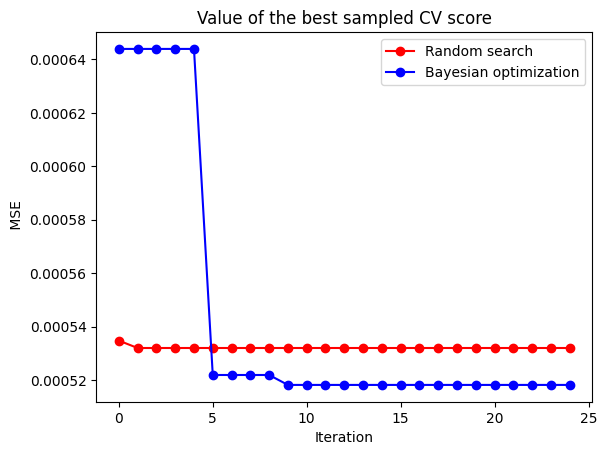

In [36]:
y_rs = np.maximum.accumulate(rs.cv_results_['mean_test_score'])
y_bo = np.maximum.accumulate(-optimizer.Y).ravel()

print(f'Baseline  MSE = {baseline:.5f}')
print(f'Random search  MSE = {y_rs[-1]:.5f}')
print(f'Bayesian optimization  MSE = {y_bo[-1]:.5f}')

plt.plot(-y_rs, 'ro-', label='Random search')
plt.plot(-y_bo, 'bo-', label='Bayesian optimization')
plt.xlabel('Iteration')
plt.ylabel(' MSE')
plt.title('Value of the best sampled CV score');
plt.legend();

### 5.2. Multi-objective Bayesian Optimization (Theory and Available Modules)

## 6. References

**Publications:**

1. Frazier, P. I. (2018). A tutorial on Bayesian optimization. arXiv preprint arXiv:1807.02811.

2. Shahriari, B., Swersky, K., Wang, Z., Adams, R. P., & De Freitas, N. (2015). Taking the human out of the loop: A review of Bayesian optimization. Proceedings of the IEEE, 104(1), 148-175.

3. Jones, D. R., Schonlau, M., & Welch, W. J. (1998). Efficient global optimization of expensive black-box functions. Journal of Global optimization, 13(4), 455.

4. Brochu, E., Cora, V. M., & De Freitas, N. (2010). A tutorial on Bayesian optimization of expensive cost functions, with application to active user modeling and hierarchical reinforcement learning. arXiv preprint arXiv:1012.2599.

**Websites:**

1. https://towardsdatascience.com/introduction-to-bayesian-linear-regression-e66e60791ea7

2. https://machinelearningmastery.com/what-is-bayesian-optimization/

3. https://distill.pub/2020/bayesian-optimization/

4. http://krasserm.github.io/2018/03/21/bayesian-optimization/

5. https://towardsdatascience.com/hyperopt-hyperparameter-tuning-based-on-bayesian-optimization-7fa32dffaf29


## Appendix A. Required Packages and Installation Tips